In [ ]:
pip install sodapy

In [46]:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)
results = client.get("vfnx-vebw", limit=4000)

# Convert to pandas DataFrame
df1 = pd.DataFrame.from_records(results)
df1

,x,y,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,combination_of_primary_and,running,chasing,...,primary_fur_color,location,above_ground_sighter,age,color_notes,highlight_fur_color,specific_location,other_activities,other_interactions,:@computed_region_efsh_h5xi
0,-73.9561344937861,40.7940823884086,37F-PM-1014-03,37F,PM,10142018,3,+,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-73.9688574691102,40.7837825208444,21B-AM-1019-04,21B,AM,10192018,4,+,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-73.9742811484852,40.775533619083,11B-PM-1014-08,11B,PM,10142018,8,Gray+,False,True,...,Gray,Above Ground,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-73.9596413903948,40.7903128889029,32E-PM-1017-14,32E,PM,10172018,14,Gray+,False,False,...,Gray,NaN,NaN,Adult,Nothing selected as Primary. Gray selected as ...,NaN,NaN,NaN,NaN,NaN
4,-73.9702676472613,40.7762126854894,13E-AM-1017-05,13E,AM,10172018,5,Gray+Cinnamon,False,False,...,Gray,Above Ground,NaN,Adult,NaN,Cinnamon,on tree stump,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3018,-73.9639431360458,40.7908677445466,30B-AM-1007-04,30B,AM,10072018,4,Gray+,False,False,...,Gray,Ground Plane,FALSE,Adult,NaN,NaN,NaN,NaN,NaN,NaN
3019,-73.9704015859639,40.7825600069973,19A-PM-1013-05,19A,PM,10132018,5,Gray+White,False,False,...,Gray,Ground Plane,FALSE,Adult,NaN,White,NaN,NaN,NaN,NaN
3020,-73.9665871993517,40.7836775064883,22D-PM-1012-07,22D,PM,10122018,7,"Gray+Black, Cinnamon, White",False,False,...,Gray,Ground Plane,FALSE,Adult,NaN,"Black, Cinnamon, White",NaN,NaN,NaN,NaN
3021,-73.9639941227864,40.7899152327912,29B-PM-1010-02,29B,PM,10102018,2,"Gray+Cinnamon, White",False,False,...,Gray,Ground Plane,FALSE,NaN,NaN,"Cinnamon, White",NaN,NaN,NaN,NaN


In [49]:
df1.isnull().sum(axis = 0)

x                                 0
y                                 0
unique_squirrel_id                0
hectare                           0
shift                             0
date                              0
hectare_squirrel_number           0
combination_of_primary_and        0
running                           0
chasing                           0
climbing                          0
eating                            0
foraging                          0
kuks                              0
quaas                             0
moans                             0
tail_flags                        0
tail_twitches                     0
approaches                        0
indifferent                       0
runs_from                         0
geocoded_column                   0
:@computed_region_f5dn_yrer       0
:@computed_region_yeji_bk3q       0
:@computed_region_92fq_4b7q       0
:@computed_region_sbqj_enih       0
primary_fur_color                55
location                    

In [48]:
#dropping columns having more than 80% missing values
cl = ['other_activities','other_interactions','specific_location','color_notes',':@computed_region_efsh_h5xi']
df1.drop(cl, axis=1, inplace=True)

Cinnamon                  270
White                     179
Cinnamon, White            82
Gray                       52
Gray, White                22
Black                      13
Black, Cinnamon, White     11
Black, Cinnamon             3
Black, White                2
Name: highlight_fur_color, dtype: int64 Adult       840
Juvenile    106
Name: age, dtype: int64 Gray        825
Cinnamon    126
Black        34
Name: primary_fur_color, dtype: int64 Ground Plane    713
Above Ground    267
Name: location, dtype: int64 FALSE    713
10        37
15        29
3         20
20        19
5         18
2         17
30        16
25        12
4         11
6          8
1          7
8          7
7          6
50         6
40         6
13         5
12         5
9          2
35         2
18         2
28         2
80         1
0          1
24         1
70         1
180        1
100        1
17         1
45         1
60         1
55         1
43         1
65         1
Name: above_ground_sighter, dtype: in

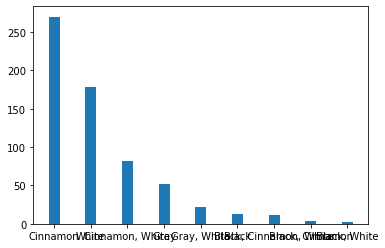

In [20]:
import matplotlib.pyplot as plt 
categories = df1['highlight_fur_color'].value_counts().index
counts = df1['highlight_fur_color'].value_counts().values
plt.bar(categories, counts, width=0.3)

#Plot distribution of variables having missing values

print(df1['highlight_fur_color'].value_counts(),df1['age'].value_counts(),df1['primary_fur_color'].value_counts()
     ,df1['location'].value_counts(),df1['above_ground_sighter'].value_counts())

           



# Missing value imputation based on their existing distribution of values

In [21]:
import numpy as np
s = df1.highlight_fur_color.value_counts(normalize=True)
missing_1 = df1['highlight_fur_color'].isnull()
df1.loc[missing_1,'highlight_fur_color'] = np.random.choice(s.index, size=len(df1[missing_1]),p=s.values)
print(df1['highlight_fur_color'].value_counts())


u = df1.age.value_counts(normalize=True)
missing_2 = df1['age'].isnull()
df1.loc[missing_2,'age'] = np.random.choice(u.index, size=len(df1[missing_2]),p=u.values)
print(df1['age'].value_counts())
                                      
                                                                

Cinnamon                  422
White                     270
Cinnamon, White           142
Gray                       81
Gray, White                38
Black                      21
Black, Cinnamon, White     19
Black, Cinnamon             5
Black, White                2
Name: highlight_fur_color, dtype: int64
Adult       889
Juvenile    111
Name: age, dtype: int64


# Omitting nulls which are insignificant in number

In [22]:
df1 = df1.dropna() 

In [23]:
df1.isnull().sum(axis = 0)

x                             0
y                             0
unique_squirrel_id            0
hectare                       0
shift                         0
date                          0
hectare_squirrel_number       0
age                           0
primary_fur_color             0
highlight_fur_color           0
combination_of_primary_and    0
location                      0
above_ground_sighter          0
running                       0
chasing                       0
climbing                      0
eating                        0
foraging                      0
kuks                          0
quaas                         0
moans                         0
tail_flags                    0
tail_twitches                 0
approaches                    0
indifferent                   0
runs_from                     0
geocoded_column               0
dtype: int64

In [121]:
from datetime import date

today = date.today()

In [144]:
import random
#str(today.strftime("%b-%d-%Y")) + "_Squirrel Data.csv"
file_name = str(today.strftime("%b-%d-%Y")) + "_Squirrel Data.csv"
df1.to_csv(file_name,index = False)
file_name

'May-24-2022_Squirrel Data.csv'

In [137]:
import pandas as pd
from sodapy import Socrata


# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
#client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
client = Socrata("data.cityofnewyork.us",
                "Citxack9fNn6Ygp6nPrNf3WAL",
                  username="hemantsain55@gmail.com",
                  password="Fucku@ll55",timeout=100)


results = client.get("7ym2-wayt", limit=20000)

# Convert to pandas DataFrame
df2 = pd.DataFrame.from_records(results)
df2


,requestid,boro,yr,m,d,hh,mm,vol,segmentid,wktgeom,street,fromst,tost,direction
0,1100,Staten Island,2011,10,14,10,45,102,103882,POINT (963246 173171.4),BAY ST,RICHMOND TERR,STUYVESANT PL,SB
1,1100,Staten Island,2011,10,14,11,0,110,103882,POINT (963246 173171.4),BAY ST,RICHMOND TERR,STUYVESANT PL,SB
2,1100,Staten Island,2011,10,14,11,15,101,103882,POINT (963246 173171.4),BAY ST,RICHMOND TERR,STUYVESANT PL,SB
3,1100,Staten Island,2011,10,14,11,30,112,103882,POINT (963246 173171.4),BAY ST,RICHMOND TERR,STUYVESANT PL,SB
4,1100,Staten Island,2011,10,14,11,45,94,103882,POINT (963246 173171.4),BAY ST,RICHMOND TERR,STUYVESANT PL,SB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1119,Staten Island,2011,10,20,0,0,31,12986,POINT (955363.8 164088.2),CLOVE RD,BEVERLY AV,VICTORY BLVD,SB
19996,1119,Staten Island,2011,10,20,0,15,23,12986,POINT (955363.8 164088.2),CLOVE RD,BEVERLY AV,VICTORY BLVD,SB
19997,1119,Staten Island,2011,10,20,0,30,26,12986,POINT (955363.8 164088.2),CLOVE RD,BEVERLY AV,VICTORY BLVD,SB
19998,1119,Staten Island,2011,10,20,0,45,20,12986,POINT (955363.8 164088.2),CLOVE RD,BEVERLY AV,VICTORY BLVD,SB


In [138]:
df2.isnull().sum(axis = 0)

requestid    0
boro         0
yr           0
m            0
d            0
hh           0
mm           0
vol          0
segmentid    0
wktgeom      0
street       0
fromst       0
tost         0
direction    0
dtype: int64

Staten Island    14659
Manhattan         5341
Name: boro, dtype: int64


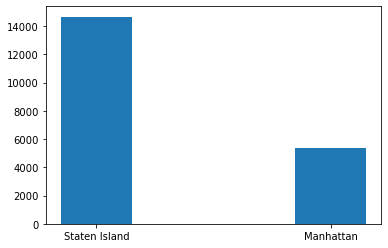

In [139]:
import matplotlib.pyplot as plt 
categories = df2['boro'].value_counts().index
counts = df2['boro'].value_counts().values
plt.bar(categories, counts, width=0.3)
print(df2['boro'].value_counts())

In [140]:
print(df2['segmentid'].value_counts(),df2['yr'].value_counts(),df2['segmentid'].value_counts(),df2['wktgeom'].value_counts()
     ,df2['street'].value_counts(),df2['fromst'].value_counts(),df2['tost'].value_counts(),df2['direction'].value_counts(),
df2['m'].value_counts(),df2['yr'].value_counts())

115270    2851
108460    2284
12620     2273
110580    2182
111161    1345
12381     1158
115236    1145
12518     1138
12508     1137
12974     1135
118532    1059
103882    1050
12986      626
112365     617
Name: segmentid, dtype: int64 2011    20000
Name: yr, dtype: int64 115270    2851
108460    2284
12620     2273
110580    2182
111161    1345
12381     1158
115236    1145
12518     1138
12508     1137
12974     1135
118532    1059
103882    1050
12986      626
112365     617
Name: segmentid, dtype: int64 POINT (993225 220772.3)      2851
POINT (941545.3 161103.1)    2284
POINT (952421.7 162885.3)    2273
POINT (940825.4 160915.4)    2182
POINT (990090.5 218746.6)    1345
POINT (950249.9 162569.1)    1158
POINT (987248.5 209892.8)    1145
POINT (951802 162950.7)      1138
POINT (951795.9 162572.3)    1137
POINT (955579.7 163754.3)    1135
POINT (959491.2 168842.7)    1059
POINT (963246 173171.4)      1050
POINT (955363.8 164088.2)     626
POINT (950229.1 162834.4)     617
Name: w

In [141]:
import random
#str(today.strftime("%b-%d-%Y")) + "_Squirrel Data.csv"
file_name = str(today.strftime("%b-%d-%Y")) + "_Traffic Volume.csv"
df2.to_csv(file_name,index = False)
file_name

'May-24-2022_Traffic Volume.csv'